# Introduction 
Some clarification and all the comparisons and comments about the plots and performances can be found in the pdf, Question 2.

In [ ]:
import random
from typing import Callable

import numpy as np
import sklearn.model_selection
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import time

# Model Implementation


In [ ]:
class LogLinearModel:
    def __init__(
        self,
        feature_function: Callable,
        learning_rate: float,
        iterations: int,
        loss: Callable,
        gradient_loss: Callable,
        verbose: bool,
    ):
        """
        Parameters
        ---
        feature_function : Callable
            Feature function mapping from X x Y -> R^m
        learning_rate : float
            Learning rate parameter eta for gradient descent
        iterations : int
            Number of iterations to run gradient descent for during `fit`
        loss : Callable
            Loss function to be used by this LogLinearModel instance as
            a function of the parameters and the data X and y
        gradient_loss : Callable
            Closed form gradient of the `loss` function used for gradient descent as
            a function of the parameters and the data X and y
        verbose : bool
            Verbosity level of the class. If verbose == True,
            the class will print updates about the gradient
            descent steps during `fit`

        """


        self.feature_function = feature_function
        self.learning_rate = learning_rate
        self.verbose = verbose
        self.iterations = iterations
        self.loss = loss
        self.gradient_loss = gradient_loss

    def gradient_descent(self, y: np.ndarray):
        """Performs one gradient descent step, and update parameters inplace.

        Parameters
        ---
        X : np.ndarray
            Data matrix
        y : np.ndarray
            Binary target values

        Returns
        ---
        None

        """


        self.gradient_value = self.gradient_loss(y,self.parameters,self.positive_features,self.negative_features)
        step_update = self.learning_rate * self.gradient_value
        self.parameters = np.subtract(self.parameters,step_update)

    def fit(self, X: np.ndarray, y: np.ndarray):
        """Fits LogLinearModel class using gradient descent.

        Parameters
        ---
        X : np.ndarray
            Input data matrix
        y : np.ndarray
            Binary target values

        Returns
        ---
        None

        """


        self.parameters = np.random.rand(2*X.shape[1])  ## initialise the parameters with random values between 0 and 1
        self.positive_features = feature_function(X, np.ones(y.shape)) ## produce the features with label 1
        self.negative_features = feature_function(X, np.zeros(y.shape)) ## produce the features with label 0

        for epoch in range(self.iterations):

            ## perform a gradient descent step and calculate the old and new loss

            prev_loss = self.loss(y,self.parameters,self.positive_features,self.negative_features)
            self.gradient_descent(y)
            curr_loss = self.loss(y,self.parameters,self.positive_features,self.negative_features)

            ##print all the details

            if self.verbose:
                abs_changes = np.abs(self.gradient_value)
                print(f"Current Iteration: {epoch}/{self.iterations} || Current loss: {curr_loss} || Change in loss: {np.abs(curr_loss-prev_loss)}"
                      f" || Absolute Largest Parameter Change: {np.max(abs_changes)} || Parameter index: {np.argmax(abs_changes)}")

    def predict(self, X: np.ndarray) -> np.ndarray:
        """Predicts binary target labels for input data `X`.

        Parameters
        ---
        X : np.ndarray
            Input data matrix

        Returns
        ---
        np.ndarray
            Predicted binary target labels

        """


        self.positive_features = feature_function(X, np.ones(X.shape[0])) ## produce the features with label 1
        self.negative_features = feature_function(X, np.zeros(X.shape[0])) ## produce the features with label 0
        prediction = np.zeros(shape=(X.shape[0],2))
        for i in range(X.shape[0]):
            prediction[i][0] = probs(0,i, self.parameters,self.positive_features,self.negative_features) ##gives the score  considering the label as zero
            prediction[i][1] = probs(1,i, self.parameters, self.positive_features, self.negative_features) ##gives the score  considering the label as one

        return np.argmax(prediction,axis=1)  ##takes the label that has the max score for each sample

# Helper Functions


In [ ]:
def feature_function(X: np.ndarray, y: np.ndarray):
    """Produce the features to be used to fit the model by taking an input sample of dimension m and producing
       an output sample of dimension 2*m that is like [features,0] if label=0 or [0,features] if label=1.

    Parameters
    ---
    X : np.ndarray
        Input data matrix
    y : np.ndarray
        Binary target values

    Returns
    ---
    np.ndarray
        Input Features matrix

    """


    features = np.zeros(shape=(X.shape[0], 2*X.shape[1]))
    for i in range(len(y)):
        if y[i] == 1:
            index = X.shape[1]
            features[i][index:] = X[i]
        else:
            index = X.shape[1]
            features[i][:index] = X[i]
    return features

def negative_log_likelihood(y: np.ndarray, parameters, positive_features,negative_features):
    """Helper function that calculate the negative log likelihood using all the training set.

    Parameters
    ---
    y : np.ndarray
        Binary target values
    parameters : np.ndarray
        fitted parameters
    positive_features : np.ndarray
        features if all label=1
    negative_features : np.ndarray
        features if all label=0

    Returns
    ---
    float
        negative log likelihood

    """


    nll = 0
    for i in range(len(y)):
            if y[i] ==1:
                numerator = np.dot(parameters, positive_features[i])
            else:
                numerator = np.dot(parameters, negative_features[i])

            denominator = - np.log(np.exp(np.dot(parameters, positive_features[i])) + np.exp(np.dot(parameters, negative_features[i])))
            nll += (numerator+denominator)

    return -nll


def probs(y: int,index, parameters, positive_features,negative_features):
    """Function that calculate the score for a sample at position "index" given the label y.

    Parameters
    ---
    y : int
        target value at position given by index
    index : int
        sample position
    parameters : np.ndarray
        fitted parameters
    positive_features : np.ndarray
        features if all label=1
    negative_features : np.ndarray
        features if all label=0

    Returns
    ---
    float
        score of sample at position "index" given the label y

    """


    if y == 1:
        numerator = np.exp(np.dot(parameters, positive_features[index]))
    else:
        numerator = np.exp(np.dot(parameters, negative_features[index]))

    denominator = np.exp(np.dot(parameters, positive_features[index])) + np.exp(np.dot(parameters, negative_features[index]))

    return numerator/denominator


def gradient_negative_log_likelihood(y: np.ndarray, parameters, positive_features,negative_features):
    """Helper function that calculate the gradient of the negative log likelihood using all the training set.

    Parameters
    ---
    y : np.ndarray
        Binary target values
    parameters : np.ndarray
        fitted parameters
    positive_features : np.ndarray
        features if all label=1
    negative_features : np.ndarray
        features if all label=0

    Returns
    ---
    float
        gradient of the negative log likelihood

    """


    grad_nll = np.zeros(parameters.shape)
    for i in range(len(y)):
        if y[i] == 1:
            first_term_grad_nll = - positive_features[i]
        else:
            first_term_grad_nll = - negative_features[i]
        second_term_grad_nll = np.add(probs(1,i,parameters,positive_features,negative_features) * positive_features[i],
                                      probs(0,i,parameters,positive_features,negative_features) * negative_features[i])
        grad_nll = np.add(grad_nll, np.add(first_term_grad_nll, second_term_grad_nll))

    return grad_nll

def map_param(parameters : np.ndarray):
    """Helper function that map features from dimension 2*m to dimension m.

    Parameters
    ---
    parameters : np.ndarray
        features array of dimension 2*m

    Returns
    ---
    np.ndarray
        features array  of dimension m

    """


    new_parameters = np.zeros(shape=(int(parameters.shape[0]/2)))
    for i in range(int(len(parameters)/2)):
        new_parameters[i] = parameters[(int(parameters.shape[0]/2)) +i] - parameters[i]
    return new_parameters

# Test the Model


In [ ]:
# Set seeds to ensure reproducibility
np.random.seed(42)
random.seed(42)

In [ ]:
# Fit both the models using the first dataset

lr_first = LogisticRegression()
learning_rate = 0.0001

llm_first = LogLinearModel(
    feature_function=feature_function,
    learning_rate=learning_rate,
    iterations=100,
    loss=negative_log_likelihood,
    gradient_loss=gradient_negative_log_likelihood,
    verbose=True
)

# First dataset
# Fit both `lr` and your `llm` on this dataset and compare
# the aspects described in the assignment PDF
X, y = make_classification(
    n_samples=100, random_state=42, n_informative=20, n_features=20, n_redundant=0
)

X_train_first, X_test_first, y_train_first, y_test_first = sklearn.model_selection.train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)


start_time = time.time()
llm_first.fit(X_train_first,y_train_first)
time_fit_llm_first = time.time() -start_time
start_time = time.time()
lr_first.fit(X_train_first,y_train_first)
time_fit_lr_first = time.time() -start_time

start_time = time.time()
llm_first.predict(X_train_first)
time_pred_llm_first = time.time() -start_time
start_time = time.time()
lr_first.predict(X_train_first)
time_pred_lr_first = time.time() -start_time

in_sample_llm_first = accuracy_score(y_true = y_train_first, y_pred = llm_first.predict(X_train_first))
out_sample_llm_first = accuracy_score(y_true = y_test_first, y_pred = llm_first.predict(X_test_first))
in_sample_lr_first = accuracy_score(y_true = y_train_first, y_pred = lr_first.predict(X_train_first))
out_sample_lr_first = accuracy_score(y_true = y_test_first, y_pred = lr_first.predict(X_test_first))



Current Iteration: 0/100 || Current loss: 169.46059646556975 || Change in loss: 2.5300668491518365 || Absolute Largest Parameter Change: 59.08859796067346 || Parameter index: 1
Current Iteration: 1/100 || Current loss: 166.97028155748714 || Change in loss: 2.4903149080826097 || Absolute Largest Parameter Change: 58.62983014116065 || Parameter index: 1
Current Iteration: 2/100 || Current loss: 164.5188003860383 || Change in loss: 2.4514811714488474 || Absolute Largest Parameter Change: 58.170550332589 || Parameter index: 1
Current Iteration: 3/100 || Current loss: 162.1052349106644 || Change in loss: 2.4135654753739004 || Absolute Largest Parameter Change: 57.71159173371671 || Parameter index: 1
Current Iteration: 4/100 || Current loss: 159.7286674895701 || Change in loss: 2.376567421094279 || Absolute Largest Parameter Change: 57.253728464848166 || Parameter index: 1
Current Iteration: 5/100 || Current loss: 157.38818404302864 || Change in loss: 2.3404834465414694 || Absolute Largest P

In [ ]:
# Fit both the models using the second dataset

lr_second = LogisticRegression()
learning_rate = 0.0001

llm_second = LogLinearModel(
    feature_function=feature_function,
    learning_rate=learning_rate,
    iterations=100,
    loss=negative_log_likelihood,
    gradient_loss=gradient_negative_log_likelihood,
    verbose=True
)

# Second dataset
# Fit both `lr` and your `llm` on this dataset and compare
# the aspects described in the assignment PDF
X, y = make_classification(
    n_samples=1000,
    random_state=42,
    n_informative=20,
    n_redundant=10,
    n_features=35,
    n_repeated=5,
)

X_train_second, X_test_second, y_train_second, y_test_second = sklearn.model_selection.train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

start_time = time.time()
llm_second.fit(X_train_second,y_train_second)
time_fit_llm_second = time.time() -start_time
start_time = time.time()
lr_second.fit(X_train_second,y_train_second)
time_fit_lr_second = time.time() -start_time

start_time = time.time()
llm_second.predict(X_train_second)
time_pred_llm_second = time.time() -start_time
start_time = time.time()
lr_second.predict(X_train_second)
time_pred_lr_second = time.time() -start_time

in_sample_llm_second = accuracy_score(y_true = y_train_second, y_pred = llm_second.predict(X_train_second))
out_sample_llm_second = accuracy_score(y_true = y_test_second, y_pred = llm_second.predict(X_test_second))
in_sample_lr_second = accuracy_score(y_true = y_train_second, y_pred = lr_second.predict(X_train_second))
out_sample_lr_second = accuracy_score(y_true = y_test_second, y_pred = lr_second.predict(X_test_second))



Current Iteration: 0/100 || Current loss: 2076.7473922078498 || Change in loss: 780.7907796324653 || Absolute Largest Parameter Change: 1237.0704916376483 || Parameter index: 64
Current Iteration: 1/100 || Current loss: 1626.7669167476336 || Change in loss: 449.9804754602162 || Absolute Largest Parameter Change: 615.0556007169741 || Parameter index: 25
Current Iteration: 2/100 || Current loss: 1308.1167036539691 || Change in loss: 318.65021309366443 || Absolute Largest Parameter Change: 503.4915130520751 || Parameter index: 25
Current Iteration: 3/100 || Current loss: 1076.409913515221 || Change in loss: 231.70679013874815 || Absolute Largest Parameter Change: 410.18169891106174 || Parameter index: 25
Current Iteration: 4/100 || Current loss: 894.7536157152698 || Change in loss: 181.65629779995118 || Absolute Largest Parameter Change: 351.6562705254995 || Parameter index: 60
Current Iteration: 5/100 || Current loss: 747.180392398875 || Change in loss: 147.57322331639477 || Absolute Lar

In [ ]:
# Fit both the models using the third dataset

lr_third = LogisticRegression()
learning_rate = 0.0001

llm_third = LogLinearModel(
    feature_function=feature_function,
    learning_rate=learning_rate,
    iterations=100,
    loss=negative_log_likelihood,
    gradient_loss=gradient_negative_log_likelihood,
    verbose=True
)
# Third dataset
# Fit both `lr` and your `llm` on this dataset and compare
# the aspects described in the assignment PDF
X, y = make_classification(
    n_samples=10000, random_state=42, n_informative=2, n_repeated=5
)

X_train_third, X_test_third, y_train_third, y_test_third = sklearn.model_selection.train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

start_time = time.time()
llm_third.fit(X_train_third,y_train_third)
time_fit_llm_third = time.time() -start_time
start_time = time.time()
lr_third.fit(X_train_third,y_train_third)
time_fit_lr_third = time.time() -start_time

start_time = time.time()
llm_third.predict(X_train_third)
time_pred_llm_third = time.time() -start_time
start_time = time.time()
lr_third.predict(X_train_third)
time_pred_lr_third = time.time() -start_time

in_sample_llm_third = accuracy_score(y_true = y_train_third, y_pred = llm_third.predict(X_train_third))
out_sample_llm_third = accuracy_score(y_true = y_test_third, y_pred = llm_third.predict(X_test_third))
in_sample_lr_third = accuracy_score(y_true = y_train_third, y_pred = lr_third.predict(X_train_third))
out_sample_lr_third = accuracy_score(y_true = y_test_third, y_pred = lr_third.predict(X_test_third))




Current Iteration: 0/100 || Current loss: 4132.595545148465 || Change in loss: 6402.48122725878 || Absolute Largest Parameter Change: 5555.148842741411 || Parameter index: 4
Current Iteration: 1/100 || Current loss: 3595.884700689979 || Change in loss: 536.710844458486 || Absolute Largest Parameter Change: 864.8754559180406 || Parameter index: 33
Current Iteration: 2/100 || Current loss: 3172.048661390689 || Change in loss: 423.83603929928995 || Absolute Largest Parameter Change: 733.1427566122462 || Parameter index: 13
Current Iteration: 3/100 || Current loss: 2863.0703860314457 || Change in loss: 308.9782753592435 || Absolute Largest Parameter Change: 589.4666789694958 || Parameter index: 33
Current Iteration: 4/100 || Current loss: 2657.8849061439155 || Change in loss: 205.18547988753016 || Absolute Largest Parameter Change: 442.16775122632487 || Parameter index: 13
Current Iteration: 5/100 || Current loss: 2532.9934052320054 || Change in loss: 124.89150091191004 || Absolute Largest

In [ ]:
# Print in-sample and out-of-sample accuracy for both the models on the 3 datasets

print(f"\n\nlog linear model train accuracy first dataset: {in_sample_llm_first}")
print(f"logistic regression train accuracy first dataset: {in_sample_lr_first}")
print(f"log linear model test accuracy first dataset: {out_sample_llm_first}")
print(f"logistic regression test accuracy first dataset: {out_sample_lr_first}")

print(f"\n\nlog linear model train accuracy second dataset: {in_sample_llm_second}")
print(f"logistic regression train accuracy second dataset: {in_sample_lr_second}")
print(f"log linear model test accuracy second dataset: {out_sample_llm_second}")
print(f"logistic regression test accuracy second dataset: {out_sample_lr_second}")

print(f"\n\nlog linear model train accuracy third dataset: {in_sample_llm_third}")
print(f"logistic regression train accuracy third dataset: {in_sample_lr_third}")
print(f"log linear model test accuracy third dataset: {out_sample_llm_third}")
print(f"logistic regression test accuracy third dataset: {out_sample_lr_third}")




log linear model train accuracy first dataset: 0.7625
logistic regression train accuracy first dataset: 0.925
log linear model test accuracy first dataset: 0.6
logistic regression test accuracy first dataset: 0.6


log linear model train accuracy second dataset: 0.76625
logistic regression train accuracy second dataset: 0.8225
log linear model test accuracy second dataset: 0.745
logistic regression test accuracy second dataset: 0.805


log linear model train accuracy third dataset: 0.8905
logistic regression train accuracy third dataset: 0.89125
log linear model test accuracy third dataset: 0.8915
logistic regression test accuracy third dataset: 0.8895


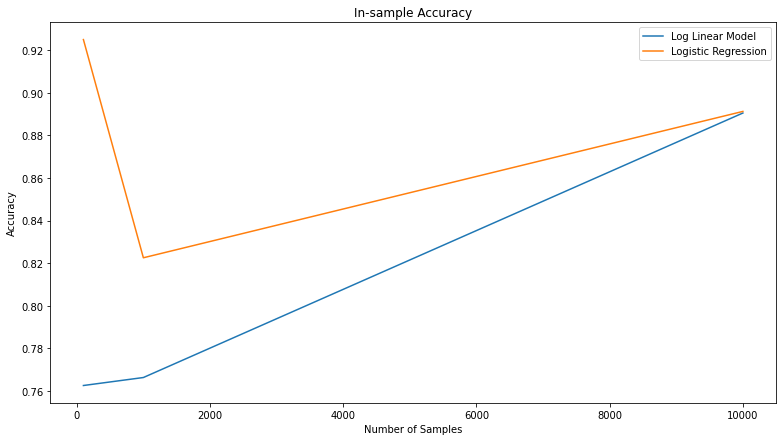

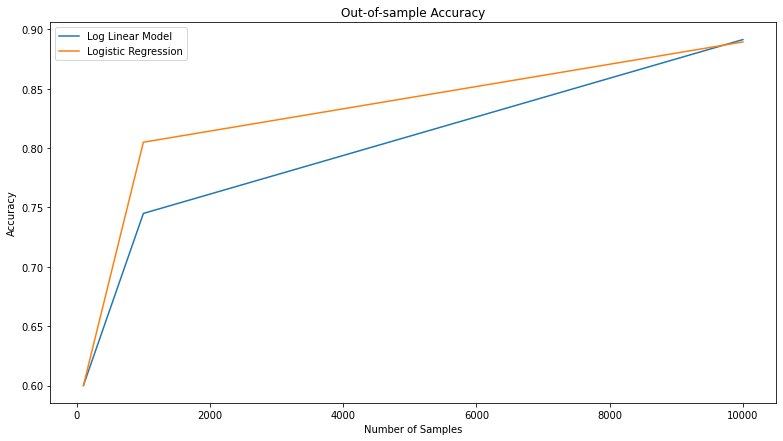

In [ ]:
# Plot in-sample and out-of-sample accuracy for both the models, number of sample on the x axis

plt.rcParams["figure.figsize"] = (13,7)

data_dim = list((100,1000,10000))
values_in_sample_llm = list((in_sample_llm_first,in_sample_llm_second,in_sample_llm_third))
values_in_sample_lr = list((in_sample_lr_first,in_sample_lr_second,in_sample_lr_third))
values_out_sample_llm = list((out_sample_llm_first,out_sample_llm_second,out_sample_llm_third))
values_out_sample_lr = list((out_sample_lr_first,out_sample_lr_second,out_sample_lr_third))


plt.plot(data_dim, values_in_sample_llm,label = "Log Linear Model")
plt.xlabel('Number of Samples')
plt.ylabel('Accuracy')
plt.plot(data_dim, values_in_sample_lr,label = "Logistic Regression")
plt.legend()
plt.title('In-sample Accuracy')
plt.show()

plt.plot(data_dim, values_out_sample_llm,label = "Log Linear Model")
plt.xlabel('Number of Samples')
plt.ylabel('Accuracy')
plt.plot(data_dim, values_out_sample_lr,label = "Logistic Regression")
plt.legend()
plt.title('Out-of-sample Accuracy')
plt.show()


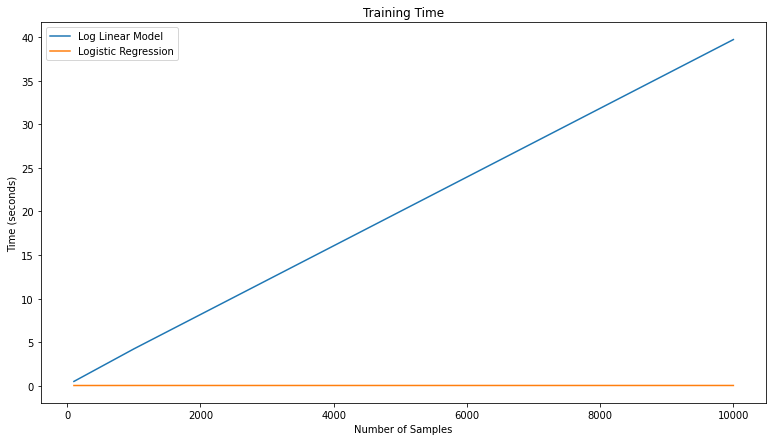

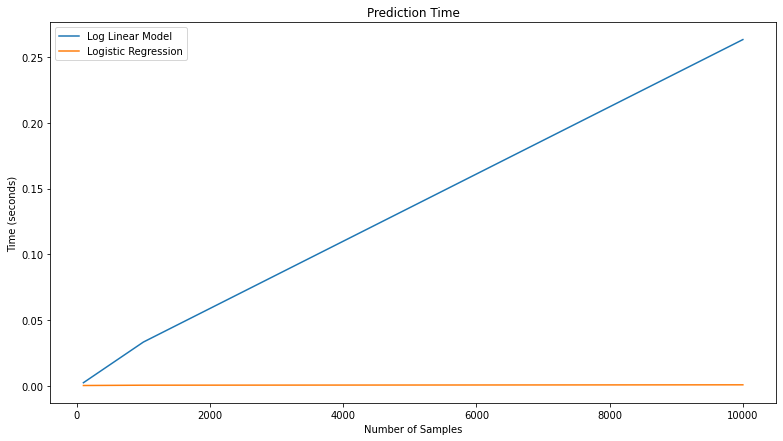

In [ ]:
# Plot the prediction time for both the model, number of sample on the x axis

values_time_fit_llm = list((time_fit_llm_first,time_fit_llm_second,time_fit_llm_third))
values_time_fit_lr = list((time_fit_lr_first,time_fit_lr_second,time_fit_lr_third))
values_time_pred_llm = list((time_pred_llm_first,time_pred_llm_second,time_pred_llm_third))
values_time_pred_lr = list((time_pred_lr_first,time_pred_lr_second,time_pred_lr_third))

plt.plot(data_dim, values_time_fit_llm,label = "Log Linear Model")
plt.xlabel('Number of Samples')
plt.ylabel('Time (seconds)')
plt.plot(data_dim, values_time_fit_lr,label = "Logistic Regression")
plt.legend()
plt.title('Training Time')
plt.show()

plt.plot(data_dim, values_time_pred_llm,label = "Log Linear Model")
plt.xlabel('Number of Samples')
plt.ylabel('Time (seconds)')
plt.plot(data_dim, values_time_pred_lr,label = "Logistic Regression")
plt.legend()
plt.title('Prediction Time')
plt.show()

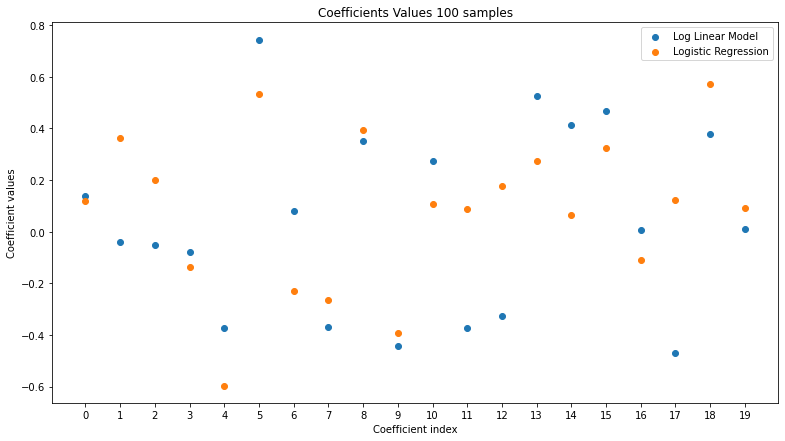

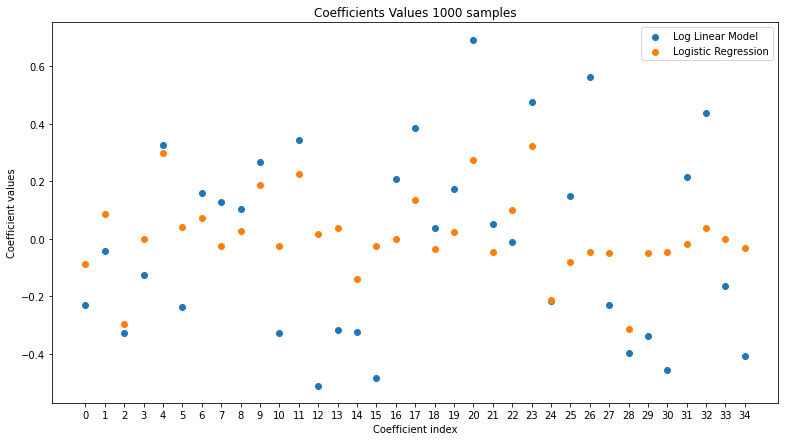

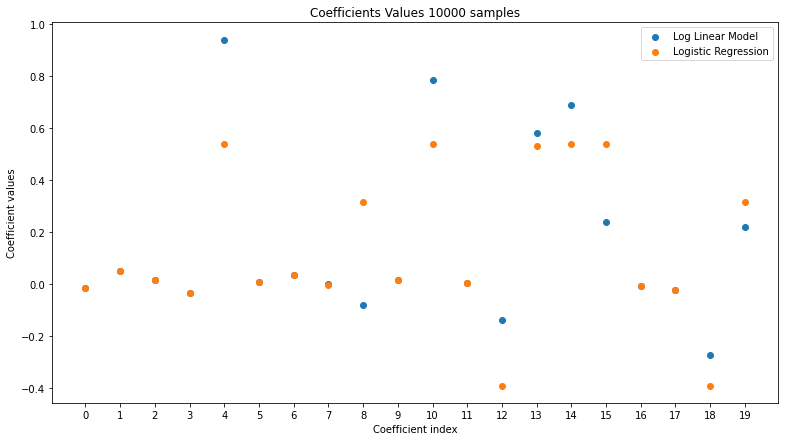

In [ ]:
# Plot Coefficient values for both model, one plot for each dataset, coefficient index on the x axis

plt.scatter(list(range(map_param(llm_first.parameters).shape[0])), map_param(llm_first.parameters),label = "Log Linear Model")
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient values')
plt.scatter(list(range(lr_first.coef_.shape[1])), lr_first.coef_.T,label = "Logistic Regression")
plt.legend()
plt.title('Coefficients Values 100 samples')
plt.xticks(list(range(lr_first.coef_.shape[1])))
plt.show()

plt.scatter(list(range(map_param(llm_second.parameters).shape[0])), map_param(llm_second.parameters),label = "Log Linear Model")
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient values')
plt.scatter(list(range(lr_second.coef_.shape[1])), lr_second.coef_.T,label = "Logistic Regression")
plt.legend()
plt.title('Coefficients Values 1000 samples')
plt.xticks(list(range(lr_second.coef_.shape[1])))
plt.show()


plt.scatter(list(range(map_param(llm_third.parameters).shape[0])), map_param(llm_third.parameters),label = "Log Linear Model")
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient values')
plt.scatter(list(range(lr_third.coef_.shape[1])), lr_third.coef_.T,label = "Logistic Regression")
plt.legend()
plt.title('Coefficients Values 10000 samples')
plt.xticks(list(range(lr_third.coef_.shape[1])))
plt.show()